In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import  warnings
warnings.filterwarnings('ignore')

In [2]:
# List all toy datasets in seaborn Library
# sns.get_dataset_names()

In [3]:
# Loading iris datasets which contains three species of iris flowers.
# target is to predict which features map to a specific Species.
iris_data = sns.load_dataset('iris')

In [4]:
iris_data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [6]:
iris_data.shape

(150, 5)

### Observation
- We have 150 entries and 5 columns namely:
1. sepal_length
2. sepal_width
3. petal_length
4. petal_width
5. speciesspecies

In [7]:
# Unique elements in our dataframe
iris_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# info() method gives a description of our dataframe in terms of attribute data types 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Check for missing values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Summary statistics
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Observation: 
- From the summary statistics we can notice that Sepal leafs are wider and longer than Petal leafs.

In [11]:
iris_data['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

The data is clean and balanced with exactly the same number of flowers per species: 50 flowers. but why do we care about the balance between number of observations per class?

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

For example, an imbalanced multiclass classification problem may have 80 percent examples in the first class, 18 percent in the second class, and 2 percent in a third class.

The minority class is harder to predict because there are few examples of this class, by definition. This means it is more challenging for a model to learn the characteristics of examples from this class, and to differentiate examples from this class from the majority class (or classes).

This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

### Data Visualization and EDA 
- This section focuses on how to produce and analyze charts that meets the best practices in both academia and industry. we will try to meet the following criteria in each graph:

- Chose the right graph that suits the variable type: to display the distribution of categorical variables we might opt for count or bar plot. As for continuous variables we might go with a histogram. If we wan to study the distribution of a continuous variable per each class of other categorical variable we can use a box plots or a kde plot with hue parameter... etc.
- Maximize Dagt-Ink Ration: it equals to the ink used to display the data devided by the total ink used in the graph. Try not to use so many colors without a good reason for that. Aviod using backround colors, or borders or any other unnecessary decorations.
- Use clear well written Titles, labels, and tick marks.

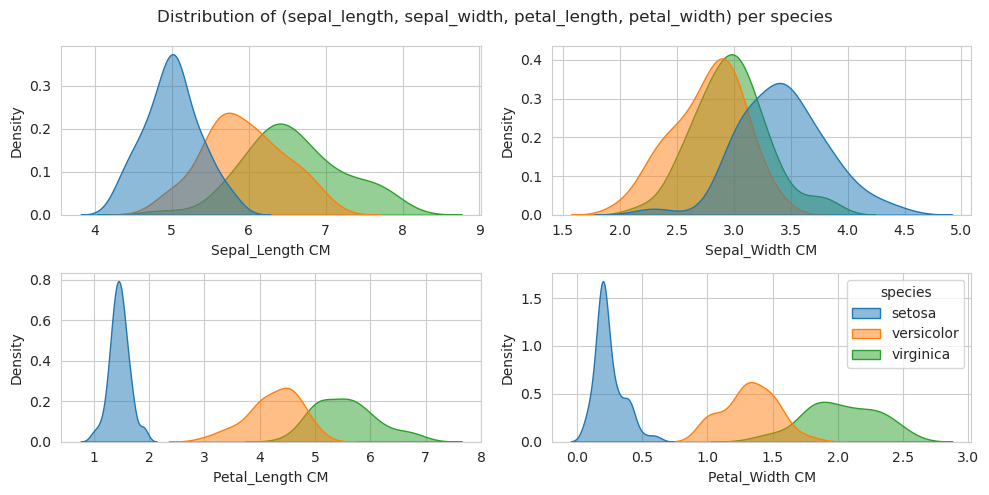

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (sepal_length, sepal_width, petal_length, petal_width) per species')

# Distribution of sepal length per Species
sns.kdeplot(ax = axes[0,0], data = iris_data, x = 'sepal_length', hue = "species", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("Sepal_Length CM")
axes[0,0].get_legend().remove()

# Distribution of sepal width per Species
sns.kdeplot(ax = axes[0,1], data = iris_data, x = 'sepal_width', hue = "species", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("Sepal_Width CM")
axes[0,1].get_legend().remove()

# Distribution of petal length per Species
sns.kdeplot(ax = axes[1,0], data =iris_data, x = 'petal_length', hue = "species", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("Petal_Length CM")
axes[1,0].get_legend().remove()
# Distribution of petal width per Species
sns.kdeplot(ax = axes[1,1], data = iris_data, x = 'petal_width', hue = "species", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("Petal_Width CM")

plt.tight_layout()

### Main conclusions from the graph:

- Setosa is easily separable from the other species, this means that the model will be able to classify it accurately.
- Petal length and width is expected to be better predictors of Species than Sepal length and width.

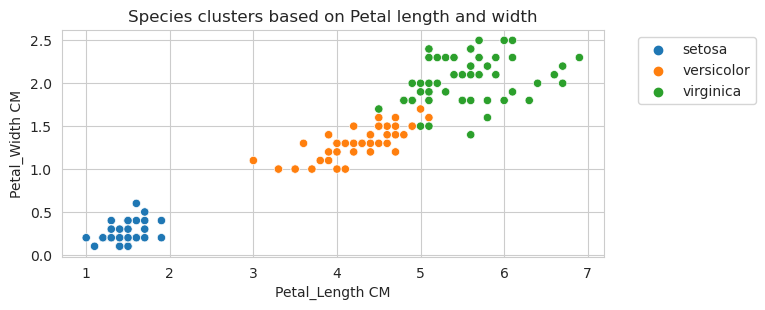

In [13]:
# Scatter plot of petal length vs petal width
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = iris_data, x = 'petal_length', y = 'petal_width', hue = "species")
plt.title("Species clusters based on Petal length and width")
plt.xlabel("Petal_Length CM")
plt.ylabel("Petal_Width CM")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

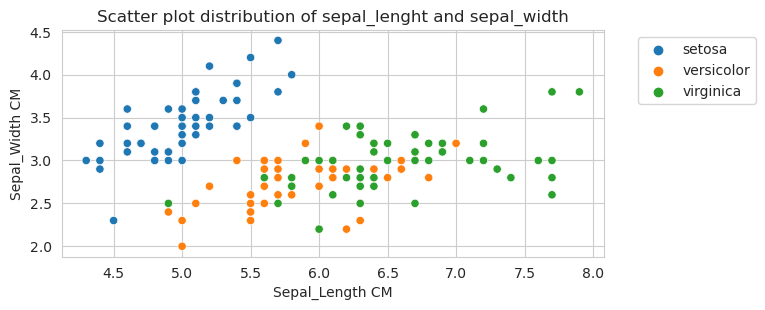

In [14]:
# Scatter plot of Sepal_length and sepal_width
plt.figure(figsize = (7,3), dpi = 100)
sns.scatterplot(data = iris_data, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.title('Scatter plot distribution of sepal_lenght and sepal_width')
plt.xlabel('Sepal_Length CM')
plt.ylabel('Sepal_Width CM')
plt.legend(bbox_to_anchor =(1.05, 1), loc='upper left')
plt.show()

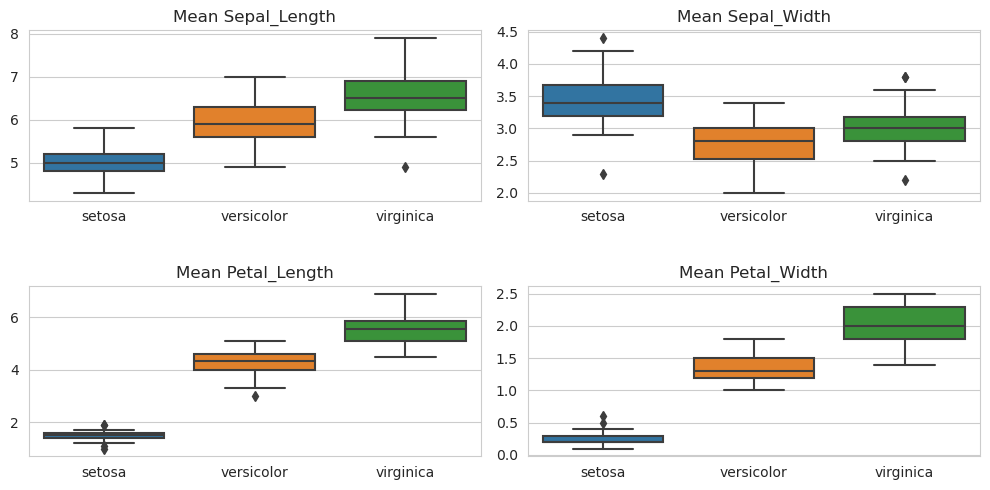

In [15]:
# boxplots
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)

#Mean Sepal Length
sns.boxplot(ax = axes[0,0], data = iris_data, x = "species", y = 'sepal_length')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("Mean Sepal_Length")


#Mean Sepal Width
sns.boxplot(ax = axes[0,1], data = iris_data, x = "species", y = 'sepal_width')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Mean Sepal_Width")

#Mean Petal Length
sns.boxplot(ax = axes[1,0], data = iris_data, x = "species", y = 'petal_length')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("Mean Petal_Length")

#Mean Petal Width
sns.boxplot(ax = axes[1,1], data = iris_data, x = "species", y = 'petal_width')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("Mean Petal_Width")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

### Observation
Scatter and box plots confirmed the aforementioned conclusion, setosa is easily separable based on petal length and width.

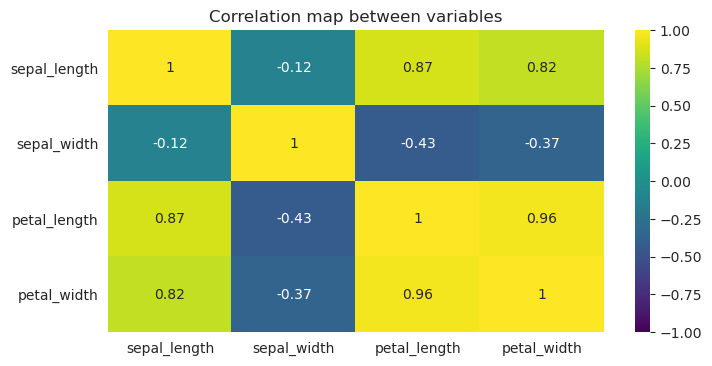

In [16]:
# Correlation Map
plt.figure(figsize = (8,4), dpi = 100)
sns.heatmap(iris_data.corr(), annot = True, cmap = 'viridis', vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
plt.show()

- Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

- Correlation coefficient ranges between -1 (perfect negative correlation) and 1 (perfect positive correlation). As you can notice, there is a strong positive correlation between petal width and length on one hand and sepal length on the other hand.

### Feature Engineering: Data Prep for model
In this section we will make sure that the data is well prepared for training the model. We will:

- Seprate the dependent variable from the independent ones.
- Perform a train test split
- Scale the data (feature scaling).

In [17]:
# 1. Seperate the dependent variable from independent variable
features = iris_data.drop('species', axis = 1)
target = iris_data['species']

In [18]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

- Why train test split ? we need to split the data into two parts:

- Training part, we will use it to train the model.

- Test part: this is unseen data (the model has never seen it before), we will use it the test the real performance of the model.
- Why we need to test on unseen data? why we do not simply train the model on the whole data and then reuse some of it for evaluation? because this will be like giving the student the answers before entring the exam, the model will be very familiar with the evaluation data because he has seen them before and he will get a full mark. In order for the test to be real, the model has to be evaluated on unseen data.

In [20]:
# 2. Split our data into train and test samples
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size = 0.2, random_state = 101)

In [22]:
X_train.shape

(120, 4)

In [23]:
X_test.shape

(30, 4)

### Why feature scaling?

- Real Life Datasets have many features with a wide range of values like for example let’s consider the house price prediction dataset. It will have many features like no. of. bedrooms, square feet area of the house, etc

- As you can guess, the no. of bedrooms will vary between 1 and 5, but the square feet area will range from 500-2000. This is a huge difference in the range of both features.

- Many machine learning algorithms that are using Euclidean distance as a metric to calculate the similarities will fail to give a reasonable recognition to the smaller feature, in this case, the number of bedrooms, which in the real case can turn out to be an actually important metric.

- To aviod this problem we need to scale the features so that they all have the same scale, i.e the same range of values. We can normalize all features so that have values between (-1, 1) or standardize them to have values between (0, 1).

- The important thing to note here is that feature scaling does not affect the relative importance of features, scaled features will still have the same orginal information and importance relative to each other.

In [24]:
# 3. Scalling Features
from sklearn.preprocessing import StandardScaler

In [25]:
# Create an Instanse of Scaler class
scaler = StandardScaler()
# fit the parameters and use it to transform the traning data
scaled_X_train = scaler.fit_transform(X_train)
# transform test data
scaled_X_test = scaler.transform(X_test)

In [26]:
scaled_X_train

array([[ 0.76416119, -0.18596829,  1.1178787 ,  1.2484939 ],
       [-0.42673937, -1.39880497,  0.10968747,  0.09800464],
       [ 0.76416119, -0.18596829,  0.94984683,  0.73716534],
       [-0.0694692 , -0.9136703 ,  0.05367685, -0.0298275 ],
       [ 1.12143136, -0.18596829,  0.94984683,  1.12066176],
       [-0.18855925, -0.67110296,  0.38974059,  0.09800464],
       [ 1.0023413 ,  0.05659904,  0.50176184,  0.35366892],
       [ 0.04962086, -0.18596829,  0.22170872,  0.35366892],
       [-0.30764931, -0.9136703 ,  0.22170872,  0.09800464],
       [ 2.19324186, -0.18596829,  1.28591057,  1.37632604],
       [-0.90309959,  1.51200306, -1.29057812, -1.05248462],
       [-1.49854987,  1.26943572, -1.57063124, -1.3081489 ],
       [-1.37945981,  0.29916638, -1.2345675 , -1.3081489 ],
       [ 1.0023413 , -0.18596829,  0.66979371,  0.6093332 ],
       [-0.30764931, -0.18596829,  0.38974059,  0.35366892],
       [-1.85582003, -0.18596829, -1.51462062, -1.43598104],
       [ 1.47870152, -0.

#### Note:

- Have you noticed that we used .fit_transform() with the traning data and only used .transform() with the test data? we did it to aviod data leakage.

### Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Model Evaluation

- Confusion matrix: A summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 

-  Accuracy score: the fraction of predictions our model got right (number of correct predictions devided by total number of predictions).

- Classification report: used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. The report shows the main classification metrics precision, recall and f1-score on a per-class basis. 
Precision: What percent of your predictions were correct? - Recall: What percent of the positive cases did you catch? - F1 score: What percent of positive predictions were correct?.

In [28]:
# creating predictions 
y_pred = log_model.predict(scaled_X_test)

In [29]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

In [30]:
log_model.predict([[0.6,3.4,1.4,0.2]])

array(['setosa'], dtype=object)

In [31]:
# import evaluation metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [32]:
# create the confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

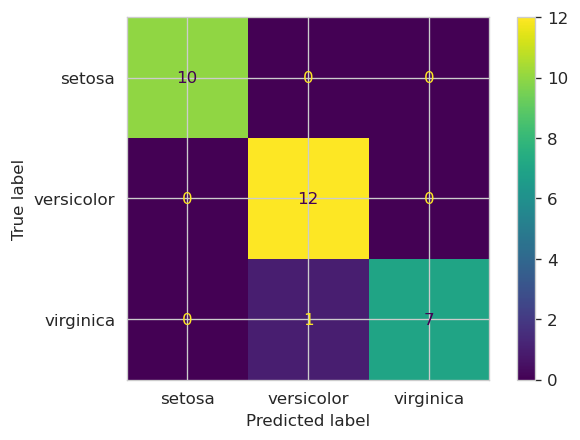

In [33]:
# plot the confusion matrix
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, scaled_X_test, y_test, ax = ax)
plt.show()

In [34]:
# measure the accuracy of our model
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.97

In [35]:
# generate the classification report 
print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



As we expected before, the model did a perfect job predicting Setosa. It only misclassified one observation as versicolor, where in fact it is virginica. However, the model performance is near perfect and we could not have done better than that.

### Model optimization: hyper parameter tuning

- Hyperparameter tuning is the process of determining the right combination of parameters that allows us to maximize model performance. We will try different values for each parameter and choose the ones that give us the best predictions.

In [36]:
# # import GridSearchCV
# from sklearn.model_selection import GridSearchCV 

# # set the range of paprameters
# penalty = ['l1', 'l2', 'elasticnet']
# C = np.logspace(0,20,50)
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# multi_class = ['ovr', 'multinomial']
# l1_ratio = np.linspace(0, 1, 20)

# # build the parameter grid
# param_grid = {
#    'penalty': penalty,
#     'C': C,
#     'solver': solver,
#     'multi_class': multi_class, 
#     'l1_ratio': l1_ratio
# }

# # initiate and fit the Grid Search Model
# grid_model = GridSearchCV(log_model, param_grid = param_grid)
# grid_model.fit(scaled_X_train, y_train)

In [37]:
# # best parameters 
# grid_model.best_params_

### Model re-evaluation
We will evaluate the optimized version of our model and see if it does better than the base model

In [38]:
# # creating predictions 
# y_pred = grid_model.predict(scaled_X_test)

# # plot the confusion matrix
# fig, ax = plt.subplots(dpi = 120)
# plot_confusion_matrix(grid_model, scaled_X_test, y_test, ax = ax);

In [39]:
# # measure the accuracy of our model
# acc_score = accuracy_score(y_test, y_pred)
# round(acc_score, 2)

In [40]:
# # generate the classification report 
# print(classification_report(y_test, y_pred)) # Hint: try it without using the print() method

The optimized model did a completely perfect job. I correctly classified all the examples in the test data. The accuracy of the model is 100 percent. Accuracy improved from 97 percent for the base model to 100 percent for the optimized model.

### How to save model

In [41]:
# Pickling a model
import pickle
pickle.dump(log_model,open('logist.pkl', 'wb'))

In [42]:
# Loading a model
load_model = pickle.load(open('logist.pkl', 'rb'))
result = load_model.score(scaled_X_test,y_test)

In [43]:
result

0.9666666666666667

In [44]:
load_model.predict(scaled_X_test)

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)